

 ---
<div id='top' /> 
   
   #  Data Analysis of The Movie Database -TMDb-
   
   ---

***Table of contents***

1. [Introduction](#id1)
2. [Data Wrangling](#id2)
  * [Data Loading](#id3)
  * [First look at the data](#id4)
  * [Possible research questions](#id5)
  * [General data check](#id6)
  * [Observations and cleaning decisions](#id7)
  * [Data cleaning](#id8)
3. [Exploratory Data Analysis](#eda)
  * [RQ1: Do the length of the film matter in terms of success?](#id9)
  * [RQ2: What is the temporal evolution of benefit ?](#id10)
  * [RQ3: Which quantitative parameters afected most the benefit of a film?](#id11)
  * [RQ4: Which Director, Actor , Production Company and Genre have achieved a high benefit?](#id12)
  * [RQ5: Which are the distributions of the variables runtime, bnumber of released films and vote average?](#id13)

  
4. [Conclusions](#conclusions)
5. [Limitations](#limitations)

<div id='id1' />

## 1. Introduction


According to what in the website says: 

"The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different."

Accroding Kaggle data overview, the dataset provides some metrics that measure how successful these movies are, concretelly:

- popularity
- revenue
- vote average score

And some other aspects that could be related (or not) to the success of a film. 
The study here investigate de dB in order to figure out some of these dependences.

##### [Return to Table of contents](#top)

<div id='id2' />


## 2. Data Wrangling

In this section of the report, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis. 



<div id='id3' />

>## Data Loading




In [1]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Load the data into a dataframe named df
df = pd.read_csv('tmdb-movies.csv')

##### [Return to Table of contents](#top)


<div id='id4' />

>##  First look at the data


In [3]:
# Print out a few lines. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# See the number of columns and rows
df.shape

(10866, 21)

In [6]:
#see the column info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# general parameters
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### [Return to Table of contents](#top)

<div id='id5' />

>##  Possible research questions


In any movie database, it seems logic to think that in some way the films will have some type of metric to allow the visitor to choose those that are considered good. In other words, they will have some measurable parameters that will inform the visitor what films can be considered successes.

According to the work database, these metrics will correspond with the following aspects:

* Vote average
* Popularity
* Revenue

And a reasonable group of aspects that can contribute are:

- Budget
- Cast
- Director
- Keywords
- Runtime
- Genres
- Vote Average
- Release Date

Therefore, it could be interesting a research to find out if there is some kind of relationship among the aspects of the database and its success (huge value of the metrics).
Thus, questions like the following have a place in this study:

- What kind of characteristics / properties are associated with high popularity movies?
- What kind of features / properties are associated with high revenue movies?
- What kind of characteristics / properties are associated with high vote average movies?
- .......

Of course, as one of the parametrs is Release Date it is possible to put to test if a evolution or an stagnation of these aspects over the years or the decades.

As well, checking which parameters corralate better with a high benefit of a film would be as well interesting. But no only quantitative parameters but also qualitative.

For example:

- Which quantitative parameters afected most the benefit of a film?
- Which Director, Actor , Production Company and Genre have been more suitable to get a high benefit?



##### [Return to Table of contents](#top)

<div id='id6' />

>##  General data check

In [8]:
# I start performing operations to inspect the data types
# and look for instances of missing or possibly errant data.

# Check the not-null values in the dataset
df.notnull().sum()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [9]:
# check the missing values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# check the duplicated row values
df.duplicated().sum()


1

In [11]:
# check the number of 0 in budget column
df_budget0=df.query('budget == 0')
df_budget0['budget'].count()

5696

In [12]:
# check the number of 0 in revenue column
df_revenue0=df.query('revenue == 0')
df_revenue0['revenue'].count()

6016

In [13]:
# check the number of 0 in runtime column
df_runtime0=df.query('runtime == 0')
df_runtime0['runtime'].count()

31

In [14]:
#kind of object is release date?
df['release_date'][10]

'10/26/15'

In [15]:
# kind of object is imbd_id?
df['imdb_id'][10]

'tt2379713'

##### [Return to Table of contents](#top)

<div id='id7' />

>##  Observations and cleaning decisions

---
### Observation 1: There are some columns that are not going to be part our study. 
>These columns are:
            - imdb_id
            - budget_adj 
            - revenue_adj
            - homepage 
            - tagline
            - overview
>#### Decision 1: Drop these columns.
---
### Observation 2: There is a duplicated row.
>#### Decision 2: Delete the row.
  --- 
### Observation 3: The results show that there are  some aspects that have missing values.
>They are:
             - imdb_id                   10
             - cast                      76
             - homepage                7930
             - director                  44
             - tagline                 2824
             - keywords                1493
             - overview                   4
             - genres                    23
             - production_companies    1030
And specifically for our study in particular we find that 
             - cast      76
             - director  44
             - genres    23
>#### Decision 3: Delete the null values because the amount is not huge.                   
---
### Observation 4: There are a lot of zero values in crutial items.
> They are
            - budget   5696
            - revenue  6016
Deleting these huge amount of data can  probably  affect the data in terms of integrity, so I think is not a good idea. I think it is better to keep those zero assuming they are missing values and replacing consequently zeros bt null values.           
>#### Decision 4:  I will replace zero values by NaN.                      
---
### Observation 5: Runtime is an important item in our temporal evolution investigation.  
>The column has some zeros.
            - runtime  31           
>#### Decision 5 The number is low enough to drop it without huge data integrity damage.
---
### Observation 6 : Release Date is a string. 
>#### Decision 6: I change the datatype from string to datetime. 



##### [Return to Table of contents](#top)

<div id='id8' />

>##  Data cleaning

### Decision 1. Dropping unuseful columns

In [16]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
# Drop  columns:
col = ['id','imdb_id',  'budget_adj', 'revenue_adj', 'homepage', 'tagline', 'overview',]
df.drop(col, axis=1, inplace=True)

In [17]:
# result of the desition 1.
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### Decision 2. Deleting duplicated rows

In [18]:
# dropping duplicate rows
# the first enrty is kept by default
df.drop_duplicates(inplace=True)

In [19]:
# check again the duplicated row values
df.duplicated().sum()

0

### Decision 3. Dropping the null values in cast , director and genres columns

In [20]:
# see if there are nulls...
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [21]:
#drop the null values in cast, director, genres columns
col_des_3 = ['cast', 'director', 'genres']
df.dropna(subset = col_des_3, how='any', inplace=True)

In [22]:
# see if there are nulls...
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

### Decision 4. Replace the zero values in budget and in revenue by NaN

In [23]:
# check the number of 0 in budget column
df_budget0=df.query('budget == 0')
df_budget0['budget'].count()

5578

In [24]:
# check the number of 0 in revenue column
df_revenue0=df.query('revenue == 0')
df_revenue0['revenue'].count()

5888

In [25]:
# replacing the zeros for NaN
df['budget']=df['budget'].replace(0,np.NaN)
df['revenue']=df['revenue'].replace(0,np.NaN)

In [26]:
# check the number of 0 in budget column
df_budget0=df.query('budget == 0')
df_budget0['budget'].count()

0

In [27]:
# check the number of 0 in revenue column
df_revenue0=df.query('revenue == 0')
df_revenue0['revenue'].count()

0

In [28]:
#Check if now we have the null values added
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


### Decision 5. Dropping zeros in runtime

In [29]:
# check the number of 0 in runtime column
df_runtime0=df.query('runtime == 0')
df_runtime0['runtime'].count()

28

In [30]:
# directly filter the runtime data with nonzero value
df['runtime']=df['runtime'].replace(0,np.NaN)

df.dropna(subset=['runtime'], how='any', inplace=True)


In [31]:
# check the number of 0 in runtime column
df_runtime0=df.query('runtime == 0')
df_runtime0['runtime'].count()

0

In [32]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


### Decision 6. Changing the ' release_date' datatype from string to datetime

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [34]:
# check the change
df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

### Data cleaning result

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null datetime64[ns]
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 1.2+ MB


In [36]:
# see if there are nulls...
df.isnull().sum()


popularity                 0
budget                  5553
revenue                 5860
original_title             0
cast                       0
director                   0
keywords                1410
runtime                    0
genres                     0
production_companies     944
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [37]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


##### [Return to Table of contents](#top)

<a id='eda'></a>
## 3. Exploratory Data Analysis

<a id='id9'></a> 
### RQ1. Do the length of the film have mattered in terms of success?

>To answer this question, I use a query to create several groups of films length. First of all, I look carefully at the runtime.  

In [38]:
#I look carefully the description of the runtime column
df.describe().runtime

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

>It is really interesting to deeply look at the data in order to figure out which are the films that are so long.


In [39]:
#I sort the values to see which fils have the length around 900 min.
df.sort_values(['runtime'], ascending=[False]) 

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,0.006925,NaN,NaN,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900.0,Documentary,NaN,2011-09-03,14,9.2,2011
4041,0.469332,NaN,NaN,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,NaN,877.0,Science Fiction,DreamWorks,2002-12-02,38,6.8,2002
2722,0.537593,NaN,125000000.0,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705.0,Action|Drama|War,HBO,2001-09-09,313,8.0,2001
6176,0.147489,NaN,NaN,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,Claude Lanzmann,NaN,566.0,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,1985-11-01,16,8.3,1985
6894,0.137913,NaN,NaN,Planet Earth,David Attenborough,Alastair Fothergill,great cinematpgraphy,550.0,Documentary,NaN,2006-12-10,65,7.6,2006
2214,0.757082,120000000.0,NaN,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,world war ii|tv mini-series|hbo,540.0,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,2010-05-16,183,7.8,2010
3356,0.136540,NaN,NaN,John Adams,Paul Giamatti|Laura Linney|Stephen Dillane|Tom...,Tom Hooper,NaN,501.0,History|Drama,NaN,2008-03-16,33,6.6,2008
1865,0.102223,NaN,NaN,Life,David Attenborough|Oprah Winfrey,Martha Holmes|Simon Blakeney|Stephen Lyle,plants|animal species|biology|wildlife|ecology,500.0,Documentary,British Broadcasting Corporation (BBC),2009-12-14,24,7.0,2009
3141,0.336308,NaN,NaN,Generation Kill,Alexander SkarsgÃ¥rd|James Ransone|Lee Tergese...,Susanna White|Simon Cellan Jones,woman director,470.0,Drama|War|History,Company Pictures,2008-07-13,28,6.6,2008
2170,0.082894,NaN,NaN,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,Sergio Mimica-Gezzan,england|based on novel|kingdom|royalty|12th ce...,421.0,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,2010-07-23,22,7.3,2010


>They a series. Therefore I consider a category of series all of the films over 250 min. As well I consider, according to Wikipedia, that a short film is under 30 min. 


In [40]:
#Bin edges that will be used to "cut" the data into groups.
bin_edges=[3,30,90,99,112,250,900]

In [41]:
#Labels for the groups.
bin_names=['short_film','medium_short','medium','medium_high','long','series']

In [42]:
# I crate a new column in the dataframe named length category and check for success.
df['lenght_category']=pd.cut(df['runtime'], bin_edges, labels= bin_names)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,lenght_category
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,long
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,long
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,long


Text(0,0.5,'Popularity')

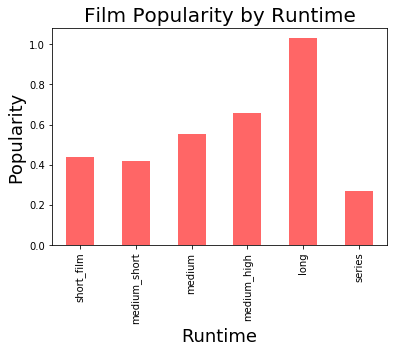

In [43]:
# For every group I calculate the mean of the popularity.
a=df.groupby('lenght_category').mean().popularity
# Plot a bar chart.
a.plot(kind='bar', color=['red'] ,alpha=.6)
plt.title('Film Popularity by Runtime', fontsize = 20)
plt.xlabel('Runtime',fontsize=18)
plt.ylabel('Popularity',fontsize=18)


> Long films appear to be more popular

Text(0,0.5,'Vote Average')

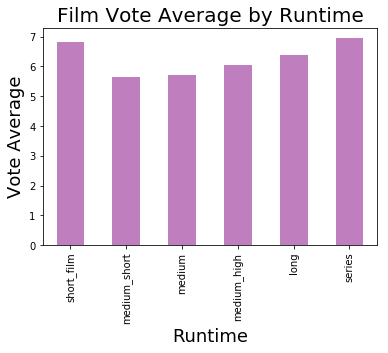

In [44]:
# For every group I calculate the mean of the popularity.
a=df.groupby('lenght_category').mean().vote_average
# Plot a bar chart.
a.plot(kind='bar', color=['purple'] ,alpha=.5)
plt.title('Film Vote Average by Runtime', fontsize = 20)
plt.xlabel('Runtime',fontsize=18)
plt.ylabel('Vote Average',fontsize=18)

> No clear possible relation

Text(0,0.5,'Revenue')

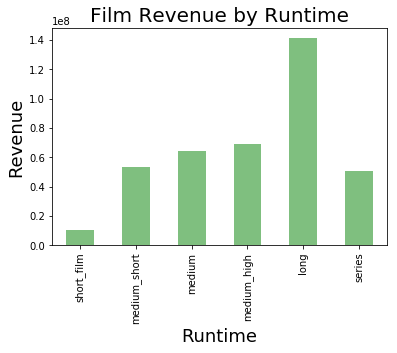

In [45]:
# For every group I calculate the mean of the popularity.
a=df.groupby('lenght_category').mean().revenue
# Plot a bar chart.
a.plot(kind='bar', color=['green'] ,alpha=.5)
plt.title('Film Revenue by Runtime', fontsize = 20)
plt.xlabel('Runtime',fontsize=18)
plt.ylabel('Revenue',fontsize=18)

> Long films appear to get a higer revenue

##### [Return to Table of contents](#top)

<a id='id10'></a> 
### RQ2. What is the temporal evolution of benefit ?

> I define a variable called benefit which is the comparssion between revenue and budget 

In [46]:
# I crate a new column in the dataframe named profit_ratio and check for success.
df.insert(1, 'benefit', df['revenue'] - df['budget'])
df.head(3)

,popularity,benefit,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,lenght_category
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,long
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,long
2,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,long


In [ ]:
benefit_sum=df.groupby('release_year')['benefit'].sum()
benefit_sum.plot(kind = 'line', figsize = (16, 8), color='r')

plt.title('Benefit Temporal Evolution', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Benefit', fontsize = 20);

> Benefit have increased especially after the beginning of the 21st Century.

##### [Return to Table of contents](#top)

<a id='id11'></a> 
### RQ3. Which quantitative parameters have afected the benefit of a film?

> I start with a heat plot of correlations in order to have a good general picture.

In [ ]:
# I calculate the correlation
corr=df.corr()

In [ ]:
# I print a heatmap
sns.heatmap(corr, cmap='Pastel2_r', linewidths=0.2, annot=True)

> According to the plot  runtime and vote_average are weeakly correlated to benefit and popularity appears to have a stronger correlation (even it is not high)

> It is interesting to go deeper in these three aspects. So, I cut Benefit in 4 categories and face them to the average of popularity and vote_average. Runtime is already analised. 

In [ ]:
#Labels for the groups.
bin_names=['non_beneficial','medium_benefitial','high_benefitial','very_high_beneficial']

In [ ]:
#Bin edges that will be used to "cut" the data into groups.
bin_edges=[-4.139124e+08,-1.312284e+06,2.014450e+07,8.198066e+07,2.544506e+09]

In [ ]:
#I look carefully the description of the benefit column
df.describe().benefit

In [ ]:
# I crate a new column in the dataframe named benefit_category and check for success.
df['benefit_category']=pd.cut(df['benefit'], bin_edges, labels= bin_names)
df.head()

>Time to plot

In [ ]:
a=df.groupby('benefit_category').mean().popularity
# For every group I calculate the mean of the popularity.

# Plot a bar chart.
a.plot(kind='barh', color=['yellowgreen'] ,alpha=.5)
plt.title('Popularity by Benefit', fontsize = 20)
plt.xlabel('Popularity',fontsize=18)
plt.ylabel('Benefit',fontsize=18)

>Films with very high benefit are more popular

In [ ]:
a=df.groupby('benefit_category').mean().vote_average
# For every group I calculate the mean of the popularity.

# Plot a bar chart.
a.plot(kind='barh', color=['teal'] ,alpha=.5)
plt.title('Vote Average by Benefit', fontsize = 20)
plt.xlabel('Vote Average',fontsize=18)
plt.ylabel('Benefit',fontsize=18)

> Vote Average appear to be independent from Benefit

> Both plots show what we expected to find after interpreting the heatmap.

##### [Return to Table of contents](#top)

<a id='id12'></a>
### RQ4. Which Director, Actor , Production Company and Genre have achieved a high benefit?

>According to benefit column parameters

In [ ]:
df.describe().benefit

>I decide to consider a film that have a benefit over 2.014450e+07 as  beneficial

In [ ]:
#I go on by creating a df only with beneficial films
benefical_col = ['original_title', 'cast', 'director','genres', 'production_companies', 'vote_average']
beneficial_df=df.query('benefit>2.014450e+07')[benefical_col]
beneficial_df.head(10)


> The problem come now because I would like to count how many times a member of the cast appears. To do so, I create a function.

In [ ]:

def counter_items_column(column):
    # This function need that we pass a column name as a parameter
    
    # This function takes the info from a column and : (1) Convert column to string and seperate the 
    # items with a '|' singn. (2) Put the values in a  1D Pandas serie and (3) Counts the repetitions
    # of every item and writes them in an descending order.
    
    # returns the count
    
    string = beneficial_df[column].str.cat(sep = '|')
    string = pd.Series(string.split('|'))
    count = string.value_counts(ascending = False)
    
    return count

In [ ]:
# I pass the director column
director_count = counter_items_column('director')
#shwoing top 10 values
director_count.head(10)

>Steven Spliberg

In [ ]:
# I pass the actor column
cast_count = counter_items_column('cast')
#shwoing top 10 values
cast_count.head(10)

>Tom Cruise 

In [ ]:
# I pass the production companies column
production_companies_count = counter_items_column('production_companies')
#shwoing top 10 values
production_companies_count.head(10)

>Universal Pictures

In [ ]:
# I pass the genre column
genres_count = counter_items_column('genres')
#shwoing top 10 values
genres_count.head(10)

>Drama

<a id='id13'></a>
### RQ5. Which are the distributions of the variables runtime, number of released films and vote average?

>I proceed to analyze the three aspects by means of a 1D histogram

In [ ]:
#I plot runtime 1D Histogram

runtime= df['runtime']
plt.hist(runtime, bins=80, color='r', alpha=0.5, rwidth=0.45)
plt.ylabel('Counts', fontsize=18)
plt.title('Counts by Runtime', fontsize = 20)
plt.xlabel('Runtime',fontsize=18)
sns.set_style('darkgrid')
plt.show()

> We are close but I will try to improve it...I adapt the dataframe to avoid series and short films. i.e. films between 30 and 225 minutes.

In [ ]:
#I go on by creating a df only with  films between 30 and 225 minutes
films_adapted_df = ['runtime']
films_adapted_df=df.query("runtime<225 & runtime>30")[films_adapted_df]
films_adapted_df.head()

In [ ]:
#I plot runtime 1D Histogram, again
runtime= films_adapted_df['runtime']
plt.hist(runtime, bins=80, color='r', alpha=0.5, rwidth=0.85)
plt.ylabel('Counts', fontsize=18)
plt.title('Counts by Runtime', fontsize = 20)
plt.xlabel('Runtime',fontsize=18)
sns.set_style('darkgrid')
plt.show()

> Time to go on with Vote Average

In [ ]:
#I plot Vote Average 1D Histogram
vote_average= df['vote_average']
plt.hist(vote_average, bins=50, color='b', alpha=0.5, rwidth=0.5)
plt.ylabel('Counts', fontsize=18)
plt.title('Counts by Vote Average', fontsize = 20)
plt.xlabel('Vote Average',fontsize=18)
plt.show()

>Finally I take into consideration Year of Release

In [ ]:
#I plot Year of Release 1D Histogram
release_year= df['release_year']
plt.hist(release_year, bins=50, color='y', alpha=0.9, rwidth=0.5)
plt.ylabel('Counts (number of films)', fontsize=16)
plt.title('Counts by Year of release', fontsize = 20)
plt.xlabel('Year of release',fontsize=16)
plt.show()

##### [Return to Table of contents](#top)

<a id='conclusions'></a>
## 4. Conclusions

> - First I have tried to find out if the duration of the movie could have some kind of relationship with the parameters associated with success. The result has shown that while the duration of the film has a possible relationship with popularity and income, it does not show a relation with the average vote. 

>- The second result obtained in this study is that the benefit of the films has been increased from 1960 to 2015. The observation of the graph also indicates that this growth has occurred exponentially and especially since the year 2000 the growth has been much more intense.

>- From the analysis of the films it has been possible to obtain a matrix of correlations that indicates, in quantitative terms, while the popularity and the benefit of a film appear correlated, the average vote and the benefit do not appear correlated.

>- In qualitative terms it has been possible to obtain a list of parameters that have led to the films that have included them in terms of economic success. Specifically, it has been observed that the director who has most participated in films of great economic success is Steven Spliberg. In the same way the actor who has participated in more films of monetary success is Tom Cruise. Analogously, the production company is Universal Pictures and finally the genre is Drama.

##### [Return to Table of contents](#top)


<a id='limitations'></a>
## 5. Limitations    

> - The first limitation comes from the database itself. It is a database that has many null values and many zeros. This necessarily implies that an associated cleaning must be done and evidently this could damage its integrity.

> - There is also a second limitation that comes from the conversion of quantitative values ​​to qualitative values. These divisions can magnify or minimize possible local correlations and subsequent conclusions.

> - I think there is an aspect that is not contemplated throughout the study. Advertising. How, how much, when it was made. I sincerely think that especially since the appearance of social networks, advertising and its new forms can help understand possible correlations and even dependencies.

>- There is also a limitation when considering for the study of the beneficial films those that are above the median (second quartile). This means that profits of ~ $ 2·10^7\$ $ point the lower bound. This value may vary at the discretion of the researcher and possibly change or modify results.

##### [Return to Table of contents](#top)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])